# Convert 2D PCA Embeddings to a Grid Using RasterFairy

Currently, the PCA embeddings look like a 2-dimensional blob of points. My goal is to visualize the movie stills in a grid. In order to do that, I'll use the [`RasterFairy`](https://github.com/Quasimondo/RasterFairy) library to create a rasterized grid of images with a fixed number of columns and rows.

***

### Loading the PCA Embeddings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
import h5py
import pathlib
import rasterfairy

Read in the PCA embeddings from the HDF5 file as a pandas DataFrame.

PCA embeddings were created in the notebook [vgg16-to-pca.ipynb](./vgg16-to-pca.ipynb).

In [3]:
h5_pca = h5py.File("data/vgg16images/pca_embeddings.hdf5","r")
embeddings = pd.DataFrame(
    h5_pca["pca_embeddings"],
    columns=list("xy")
)
h5_pca.close()
embeddings.head()

,x,y
0,16.193955,-10.980604
1,-14.780644,-8.912992
2,-19.676006,-5.788663
3,-22.680447,-2.001514
4,-17.853306,-7.820119


Looking at the raw, 2D PCA embeddings, many of the movies are bunched up on top of eachother. This is where `RasterFairy` comes in. It will transform the PCA point cloud to a raster -- where the images are sorted into a grid of points.

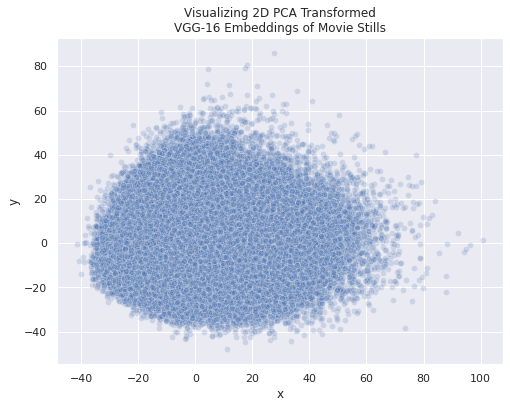

In [4]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    "x","y",
    data=embeddings,
    alpha=0.2
)
plt.title(
    "Visualizing 2D PCA Transformed\n"
    "VGG-16 Embeddings of Movie Stills"
);

***

### Working with RasterFairy

In [5]:
n_stills = len(embeddings)
print(f"There are {n_stills:,d} movie stills")

There are 132,617 movie stills


RasterFairy can suggest possible grid dimensions based on the number of points in the point cloud.

In [6]:
arrangements = rasterfairy.getRectArrangements(n_stills)
arrangements

[(269, 493), (29, 4573), (17, 7801), (1, 132617)]

Rasterizing the image grid using `RasterFairy`

In [7]:
grid_xy, (width, height) = rasterfairy.transformPointCloud2D(
    embeddings.values
)
grid_xy.shape

(132617, 2)

Examining the results, we see that `RasterFairy` gives us a numpy matrix, with the shape `(n_images, 2)`, holding the new rasterized `(x, y)` locations of the images. 

In [8]:
grid_xy[:5]

array([[147., 135.],
       [119., 153.],
       [ 49., 189.],
       [201., 225.],
       [207., 164.]])

In [9]:
width, height

(269, 493)

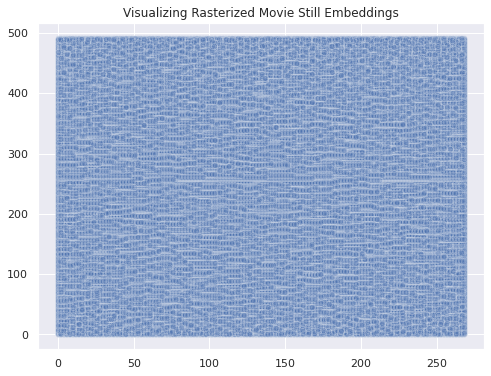

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    grid_xy[:,0],
    grid_xy[:,1],
    alpha=0.2
)
plt.title(
    "Visualizing Rasterized "
    "Movie Still Embeddings"
);

__Note:__ This doesn't show any information about the movie stills themselves, just that our embeddings have been snapped to a fixed grid.

***

### Saving the Rasterized Embeddings

In [11]:
h5_raster = h5py.File("data/vgg16images/raster_embeddings.hdf5","w")
h5_raster

<HDF5 file "raster_embeddings.hdf5" (mode r+)>

In [12]:
h5_raster.create_dataset(
    "raster_embeddings",
    data=grid_xy.astype("int32")
)
h5_raster.close()